In [7]:
!pip install rouge-metric
!pip install sentence-transformers
!pip install scikit-learn
!pip install matplotlib

ROUGE-L Scores:
{'Augustus': {'Gist': 1.0, 'Chat-GPT': 0.21874999999999997, 'Gemini': 0.31521739130434784}, 'Newton': {'Gist': 1.0, 'Chat-GPT': 0.39999999999999997, 'Gemini': 0.378698224852071}, 'Lenin': {'Gist': 1.0, 'Chat-GPT': 0.4278074866310161, 'Gemini': 0.4540540540540541}, 'Assange': {'Gist': 1.0, 'Chat-GPT': 0.45989304812834225, 'Gemini': 0.4180790960451978}}

Sentence Embedding Similarity Scores:
{'Augustus': {'Gist': 1.0, 'Chat-GPT': 0.7910701, 'Gemini': 0.839798}, 'Newton': {'Gist': 1.0000001, 'Chat-GPT': 0.9377842, 'Gemini': 0.88960564}, 'Lenin': {'Gist': 0.99999994, 'Chat-GPT': 0.9418858, 'Gemini': 0.95246994}, 'Assange': {'Gist': 1.0, 'Chat-GPT': 0.9705218, 'Gemini': 0.9582113}}


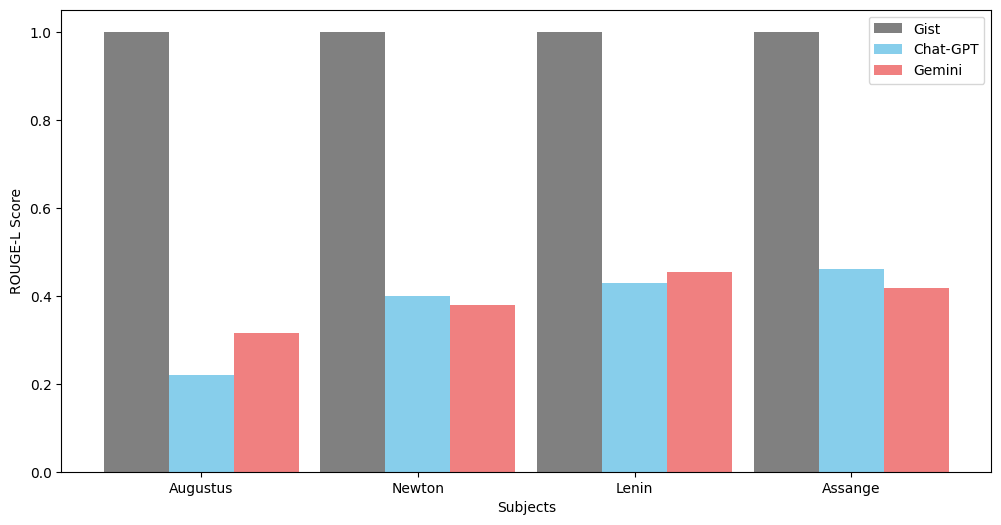

In [14]:


from rouge_metric import PyRouge
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

gist_summaries = {
    "Augustus": """Augustus was the first emperor of Rome, though he never took the title explicitly. After Julius Caesar's assassination, he emerged victorious in the civil wars, defeating Mark Antony and Cleopatra. He established the principate, a system where he held ultimate power while maintaining the facade of the Republic. His rule marked the Pax Romana, a long period of peace and prosperity. He expanded the empire, secured its borders, reformed governance, and strengthened bureaucracy. His famous quote, "I found Rome built of bricks and left it in marble," symbolizes his impact. He died at 75 and was succeeded by Tiberius, his adopted son.""",

    "Newton": """Isaac Newton was a key figure in the Scientific Revolution and is best known for formulating the laws of motion and universal gravitation. His work, *Philosophiæ Naturalis Principia Mathematica*, laid the foundation for classical mechanics. He also made groundbreaking contributions to optics, discovering that white light is composed of different colors, and built the first reflecting telescope. Additionally, he co-developed calculus, though his priority was disputed with Leibniz. Beyond science, he served as Master of the Royal Mint and President of the Royal Society. His theories remained dominant until the advent of Einstein’s relativity.""",

    "Lenin": """Vladimir Lenin was the leader of the Bolshevik Revolution and the founder of Soviet Russia and the Soviet Union. He led the October Revolution of 1917, overthrowing the Provisional Government and establishing a socialist state. Lenin’s policies included land redistribution, nationalization of industry, and withdrawal from World War I via the Treaty of Brest-Litovsk. He centralized power in the Communist Party and suppressed opposition during the Red Terror. Later, he introduced the New Economic Policy (NEP) to stabilize the economy. His death in 1924 led to a power struggle that eventually saw Stalin take control.""",

    "Assange": """Julian Assange is an Australian journalist and activist, best known as the founder of WikiLeaks, an organization that publishes classified documents. In 2010, WikiLeaks released U.S. military files and diplomatic cables, sparking global debates on press freedom and national security. Assange took refuge in the Ecuadorian embassy in London in 2012 to avoid extradition, staying there for nearly seven years. In 2019, he was arrested and imprisoned in the UK, facing U.S. charges under the Espionage Act. After lengthy legal battles, he secured a plea deal in 2024, allowing him to return to Australia."""
}

chatgpt_summaries = {
    "Augustus": """The first Roman emperor, Augustus, transformed Rome from a republic into an empire, ushering in the Pax Romana. Originally named Gaius Octavius, he was Julius Caesar’s adopted heir. After Caesar’s assassination, Augustus defeated his rivals, including Mark Antony and Cleopatra, at the Battle of Actium (31 BC). Though he maintained the outward structure of the Republic, he concentrated power in himself, becoming Rome’s de facto ruler. His reign saw military expansion, administrative reforms, infrastructure development, and economic stability. He died in AD 14 and was succeeded by his stepson, Tiberius.""",

    "Newton": """Isaac Newton was a revolutionary scientist who laid the foundation for classical physics. His *Principia Mathematica* (1687) formulated the laws of motion and universal gravitation, explaining planetary orbits and mechanical interactions. He made key discoveries in optics, proving that white light consists of multiple colors, and developed calculus independently of Leibniz. Beyond science, Newton played a role in Britain’s economic reforms as Master of the Royal Mint. As President of the Royal Society, he influenced scientific thought for centuries. His work remained dominant until modern physics introduced relativity and quantum mechanics.""",

    "Lenin": """Vladimir Lenin was a Marxist revolutionary and the architect of Soviet communism. He led the Bolsheviks in the October Revolution of 1917, establishing the world's first socialist state. His government nationalized land and industry, suppressed political opposition, and withdrew Russia from World War I via the Treaty of Brest-Litovsk. To recover from economic collapse, he implemented the New Economic Policy (NEP), allowing limited private enterprise. His rule was marked by the Red Terror, aimed at eliminating dissent. After suffering strokes, Lenin died in 1924, leaving a power vacuum that Stalin ultimately filled.""",

    "Assange": """Julian Assange is an Australian journalist and founder of WikiLeaks, an organization known for publishing classified documents. He gained global attention in 2010 for exposing U.S. military activities in Iraq and Afghanistan, sparking debates on government transparency and press freedom. Facing extradition to the U.S., he sought asylum in the Ecuadorian embassy in London in 2012, where he remained until his arrest in 2019. He was later incarcerated in the UK while fighting U.S. charges under the Espionage Act. In 2024, he accepted a plea deal, securing his release and returning to Australia."""
}

gemini_summaries = {
    "Augustus": """Augustus, born Gaius Octavius, was Rome’s first emperor, ruling from 27 BC to AD 14. After Julius Caesar’s assassination, he formed the Second Triumvirate but later emerged as sole ruler following his victory over Mark Antony and Cleopatra. While maintaining the illusion of the Republic, he centralized power, establishing the principate. His reign initiated the Pax Romana, a long period of stability and expansion. Augustus reformed governance, improved infrastructure, and strengthened the military. His autocratic system set the precedent for future emperors.""",

    "Newton": """Sir Isaac Newton (1642–1727) was an English scientist and mathematician who revolutionized physics and mathematics. His *Principia Mathematica* formulated the laws of motion and universal gravitation, laying the foundation for classical mechanics. He made fundamental contributions to optics and independently co-developed calculus. Newton also played a crucial role in Britain’s monetary system as Master of the Royal Mint and led the Royal Society. His work profoundly shaped modern science, influencing fields from astronomy to engineering.""",

    "Lenin": """Vladimir Lenin (1870–1924) was a Russian revolutionary and the founder of Soviet communism. Leading the Bolshevik faction, he orchestrated the October Revolution of 1917, establishing a socialist government. He nationalized industries, withdrew Russia from World War I, and led the Red Army to victory in the Russian Civil War. Lenin’s policies centralized power in the Communist Party, enforcing strict control through the Red Terror. To stabilize the economy, he introduced the New Economic Policy (NEP). Lenin’s death in 1924 triggered a power struggle that resulted in Stalin’s rise to power.""",

    "Assange": """Julian Assange (born 1971) is an Australian journalist, activist, and the founder of WikiLeaks. He became internationally known in 2010 for publishing classified U.S. military and diplomatic documents. While his work was praised for exposing government misconduct, he was also accused of endangering national security. Seeking asylum, he lived in Ecuador’s London embassy from 2012 to 2019 before his arrest. Assange faced extradition to the U.S. under the Espionage Act but secured a plea deal in 2024, allowing him to return to Australia."""
}


example_subjects = ["Augustus", "Newton", "Lenin", "Assange"]
summary_types = ["Gist", "Chat-GPT", "Gemini"]

# Initialize ROUGE and Sentence Transformer
rouge = PyRouge()
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Storage for Scores
rouge_l_scores = {}
similarity_scores = {}

# Evaluation Loop
for subject in example_subjects:
    rouge_l_scores[subject] = {}
    similarity_scores[subject] = {}

    for summary_type in summary_types:
        # Select the correct summary dictionary
        if summary_type == "Gist":
            summary_dict = gist_summaries
        elif summary_type == "Chat-GPT":
            summary_dict = chatgpt_summaries
        else:  # "Gemini"
            summary_dict = gemini_summaries

        # ROUGE-L Calculation
        scores = rouge.evaluate([summary_dict[subject]], [[gist_summaries[subject]]])
        rouge_l_f1 = scores['rouge-l']['f']
        rouge_l_scores[subject][summary_type] = rouge_l_f1

        # Sentence Embedding Similarity Calculation
        embeddings_gist = embedder.encode(gist_summaries[subject])
        embeddings_ai = embedder.encode(summary_dict[subject])
        similarity = cosine_similarity([embeddings_gist], [embeddings_ai])[0][0]
        similarity_scores[subject][summary_type] = similarity

# Print Results
print("ROUGE-L Scores:")
print(rouge_l_scores)
print("\nSentence Embedding Similarity Scores:")
print(similarity_scores)

# --- Plotting ---

# ROUGE-L Scores Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.3
x = range(len(example_subjects))

gist_rouge = [rouge_l_scores[subject]['Gist'] for subject in example_subjects]
chatgpt_rouge = [rouge_l_scores[subject]['Chat-GPT'] for subject in example_subjects]
gemini_rouge = [rouge_l_scores[subject]['Gemini'] for subject in example_subjects]

ax.bar(x, gist_rouge, bar_width, label='Gist', color='gray')
ax.bar([i + bar_width for i in x], chatgpt_rouge, bar_width, label='Chat-GPT', color='skyblue')
ax.bar([i + 2 * bar_width for i in x], gemini_rouge, bar_width, label='Gemini', color='lightcoral')

ax.set_xlabel('Subjects')
ax.set_ylabel('ROUGE-L Score')
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(example_subjects)
ax.legend()
plt.show()
